# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [18]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

Explore rossmann sales Prediction DataFrame analysis

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# loading csv File
path = "/content/drive/MyDrive/retail/store.csv"
store_data = pd.read_csv(path)


In [21]:
#first look of the sales data
store_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [22]:
store_data.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [23]:
# loading csv File
path = "/content/drive/MyDrive/retail/Rossmann Stores Data.csv"
sales_data = pd.read_csv(path)

In [5]:
#first look of the store data
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [24]:
#info about the sales dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


**There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types**

In [ ]:
#info about the store dataset
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on.**

In [ ]:
sales_data.shape

(1017209, 9)

In [ ]:
store_data.shape

(1115, 10)

In [ ]:
sales_data.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
store_data.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


**Data cleaning**


**Missing the null values**




In [25]:
#null values in sales data
sales_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**We can see that we have no any null values in our sales dataset**

In [26]:
#null values in stores df
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

# **Out of 1115 entries there are missing values for the columns:**

 ** CompetitionDistance- distance in meters to the nearest competitor store, the distribution plot would give us an idea about the distances at which generally the stores are opened and we would impute the values accordingly

 ** CompetitionOpenSinceMonth- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month


** CompetitionOpenSinceYear- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month


**  Promo2SinceWeek, Promo2SinceYear and PromoInterval are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

**distribution plot of all null values**

Text(0.5, 0, 'CompetitionOpenSinceYear Distribution Plot')

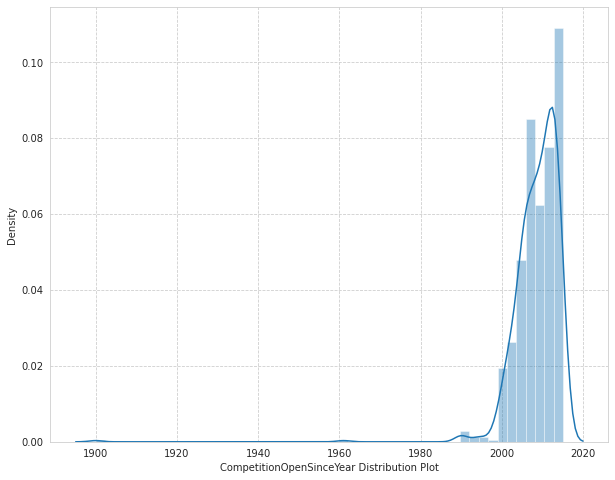

In [27]:
#distribution plot of CompetitionOpenSinceYear
plt.figure(figsize=(10,8))
sns.distplot(x=store_data['CompetitionOpenSinceYear'], hist = True)
plt.xlabel('CompetitionOpenSinceYear Distribution Plot')

****

**It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.**

Text(0.5, 0, 'CompetitionOpenSinceMonth Distribution Plot')

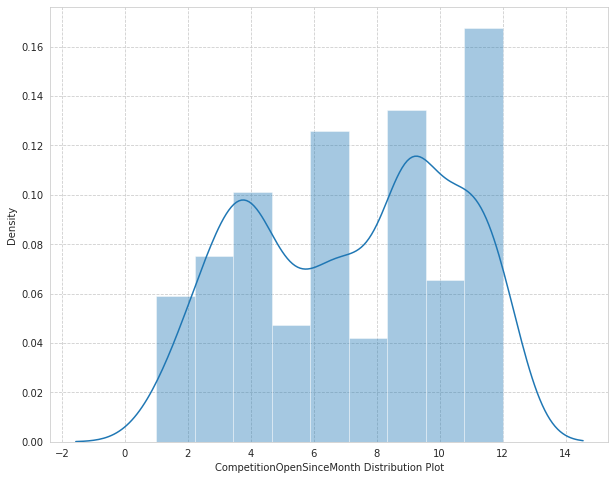

In [ ]:
#distribution plot of CompetitionOpenSinceMonth
plt.figure(figsize=(10,8))
sns.distplot(x=store_data['CompetitionOpenSinceMonth'], hist = True)
plt.xlabel('CompetitionOpenSinceMonth Distribution Plot')

Text(0.5, 0, 'CompetitionOpenSinceYear Distribution Plot')

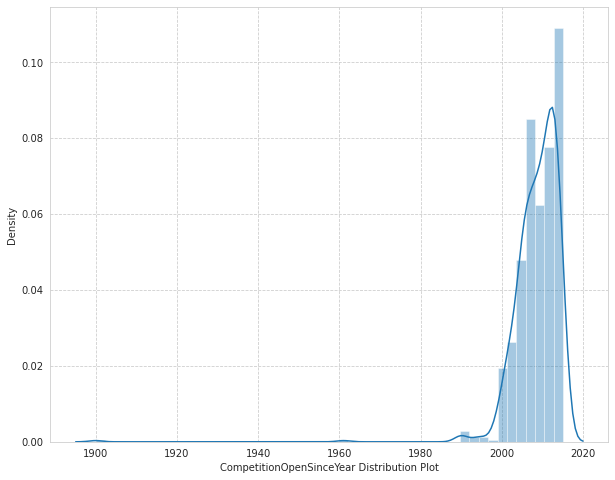

In [ ]:
#distribution plot of CompetitionOpenSinceYear
plt.figure(figsize=(10,8))
sns.distplot(x=store_data['CompetitionOpenSinceYear'], hist = True)
plt.xlabel('CompetitionOpenSinceYear Distribution Plot')

Text(0.5, 0, 'Promo2SinceWeek Distribution Plot')

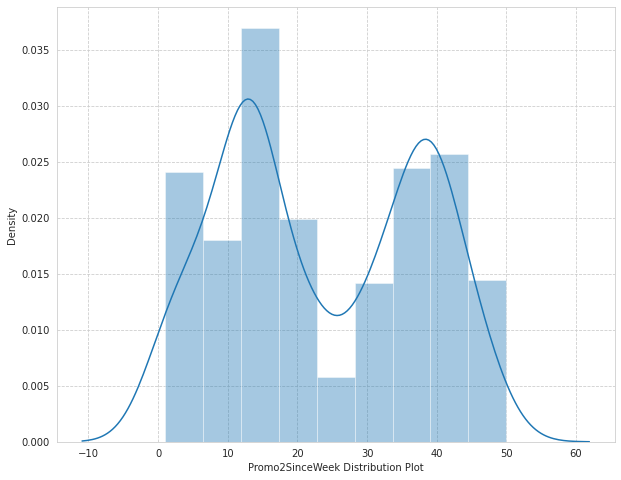

In [ ]:
#distribution plot of Promo2SinceWeek
plt.figure(figsize=(10,8))
sns.distplot(x=store_data['Promo2SinceWeek'], hist = True)
plt.xlabel('Promo2SinceWeek Distribution Plot')

**1st competition distance column**

In [28]:
# filling competition distance with the median value
store_data['CompetitionDistance'].fillna(store_data['CompetitionDistance'].median(), inplace = True)

In [29]:
#null values in stores df
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**we will handel the missing and null values in competition distance column filled with median**

**2nd and 3rd CompetitionOpenSinceMonth  and CompetitionOpenSinceYear cloumn**

In [30]:
# filling CompetitionOpenSinceMonth  and CompetitionOpenSinceYear with the most occuring values of the columns i.e modes of those columns
store_data['CompetitionOpenSinceMonth'].fillna(store_data['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
store_data['CompetitionOpenSinceYear'].fillna(store_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [31]:
#null values in stores df
store_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**we will handel the missing and null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear column filled with mode**

**4th . 5th ,6th Promo2SinceWeek , Promo2SinceYear and PromoInterval columns filled with zero (0)**

In [32]:
# imputing the nan values of promo2 related columns with 0
store_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
store_data['Promo2SinceYear'].fillna(value=0,inplace=True)
store_data['PromoInterval'].fillna(value=0,inplace=True)

In [33]:
#null values in stores df
store_data.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

**we will handel the missing and null values in Promo2SinceWeek , Promo2SinceYear and PromoInterval columns filled with zero (0)**

**And finally we can see that we have no any missing and null values in our dataset**

**Merging the two Datasets**

In [34]:
#merge the datasets on stores data
df = sales_data.merge(right=store_data, on="Store", how="left")

In [35]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,9.0,2013.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
df.shape

(1017209, 18)

In [36]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [38]:
#Extracting categorical columns
categorical_features= df.select_dtypes(include='object')
categorical_features

,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,2015-07-31,0,c,a,0
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
3,2015-07-31,0,c,c,0
4,2015-07-31,0,a,a,0
...,...,...,...,...,...
1017204,2013-01-01,a,a,a,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,a,c,c,0
1017206,2013-01-01,a,a,c,0
1017207,2013-01-01,a,a,c,0


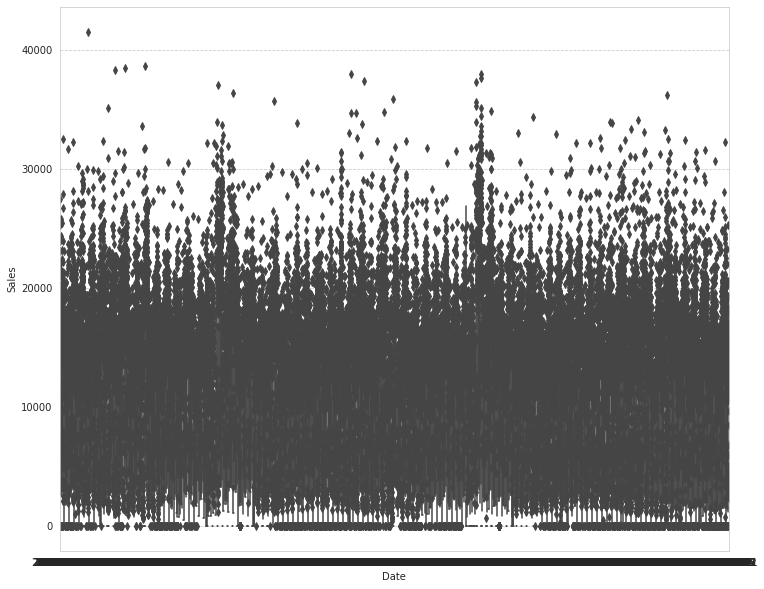

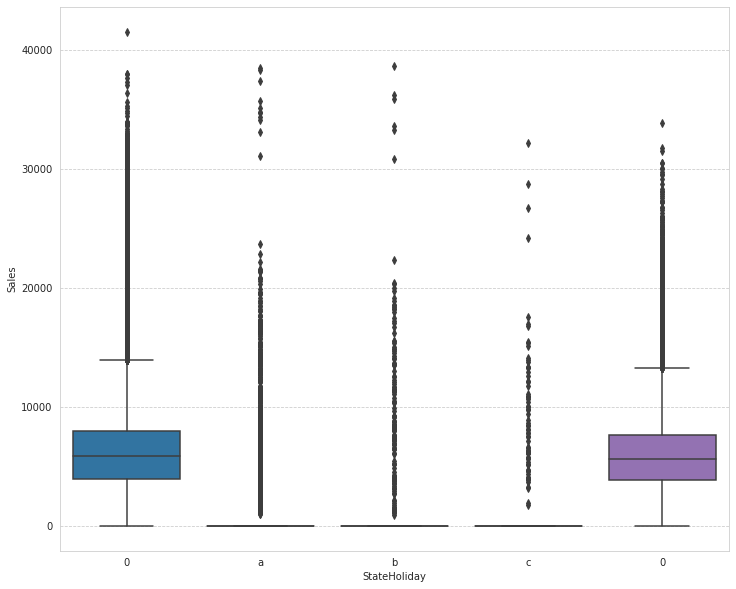

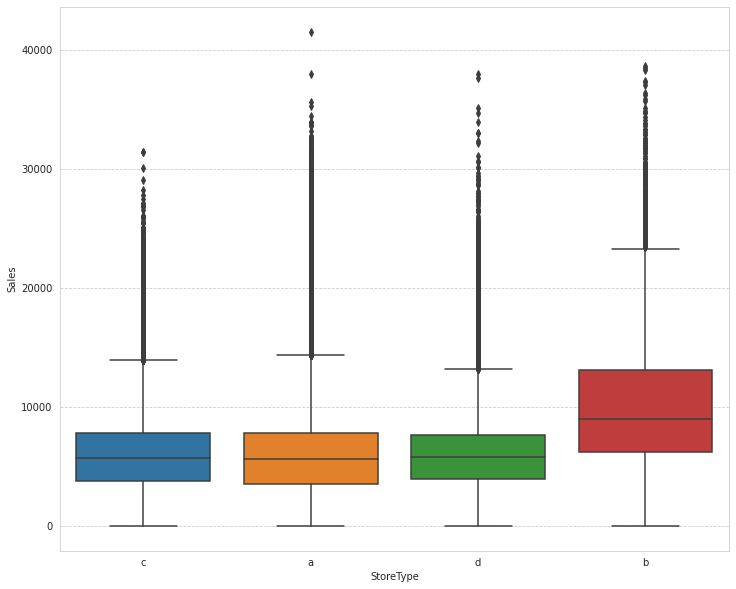

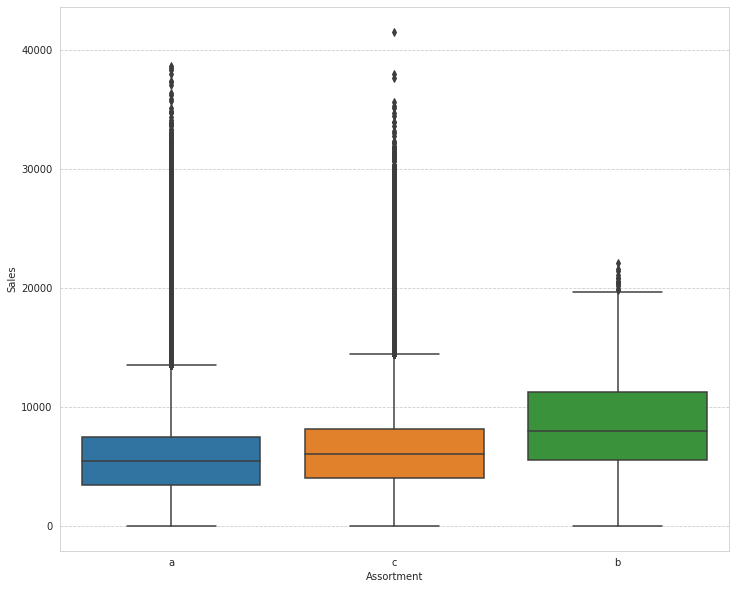

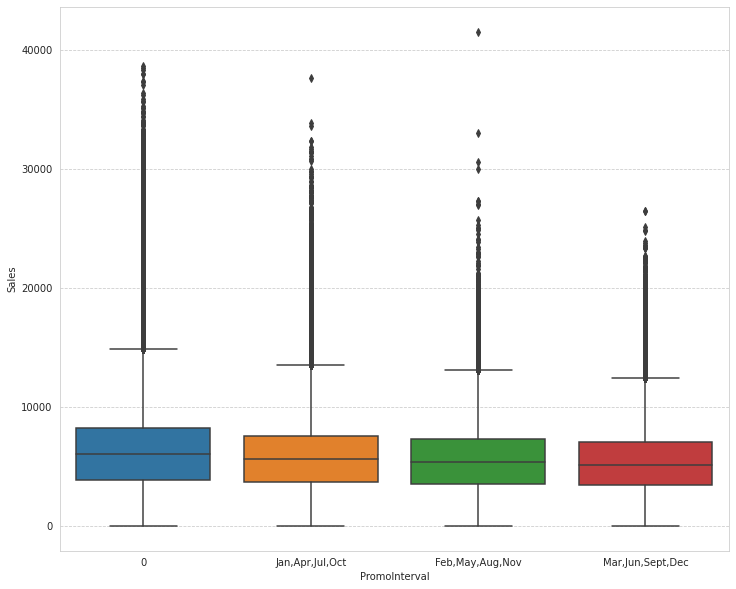

In [ ]:
#ploting Box plot to visualize and trying to get information from plot
for col in categorical_features:
  plt.figure(figsize=(12,10))
  sns.boxplot(x=df[col],y=df["Sales"])
  plt.show()

In [39]:
#extracting numeric columns
numeric_features= df.select_dtypes(exclude='object')

In [ ]:
#numeric columns info
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
dtypes: float64(5

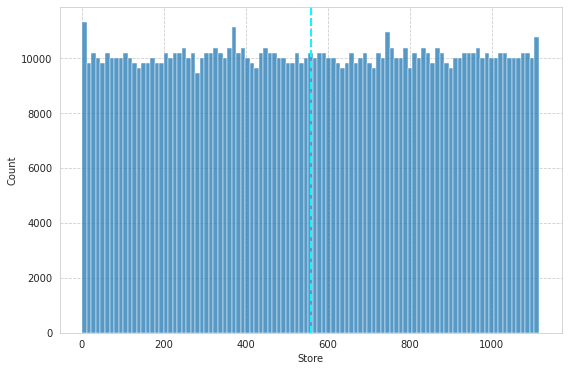

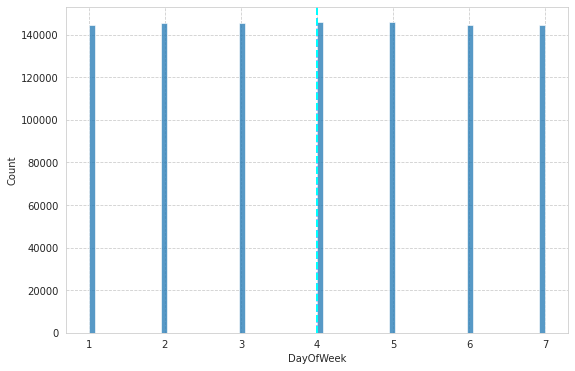

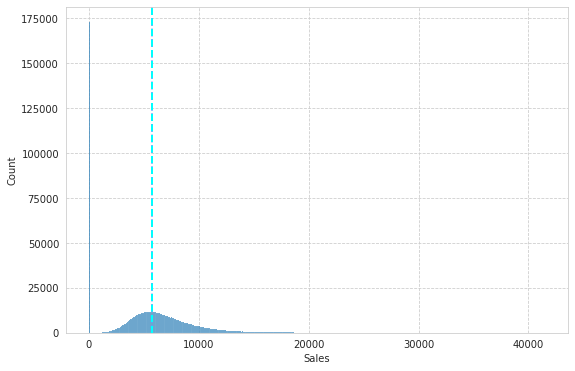

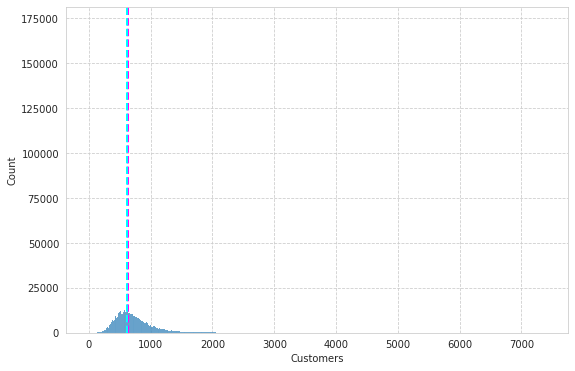

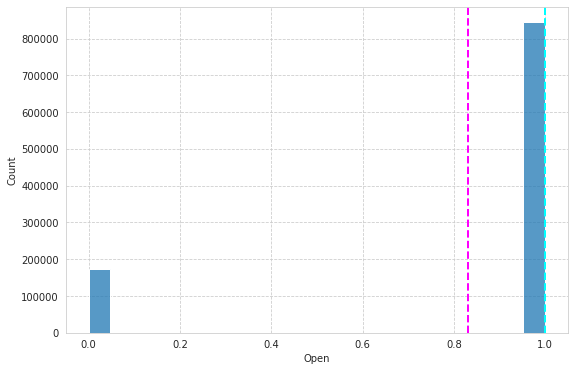

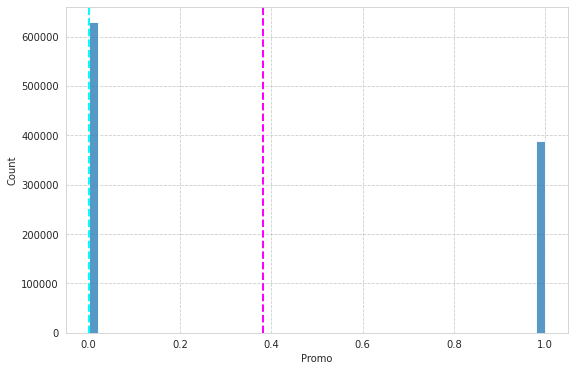

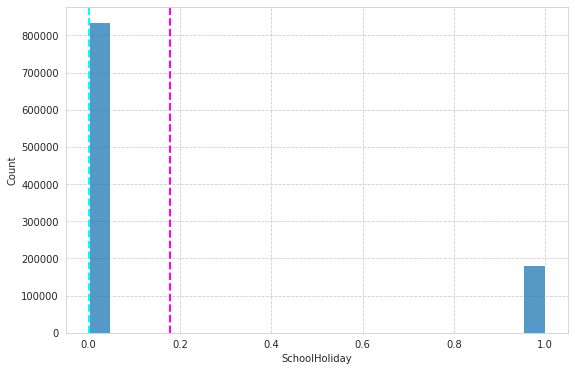

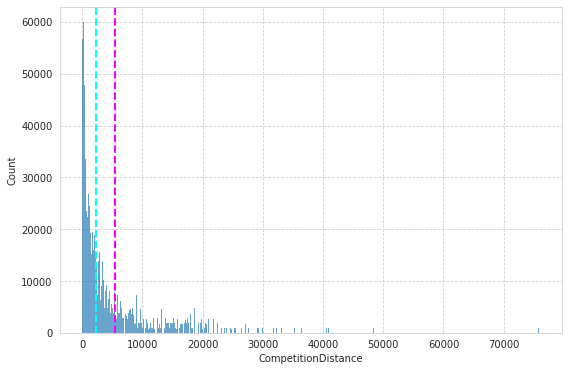

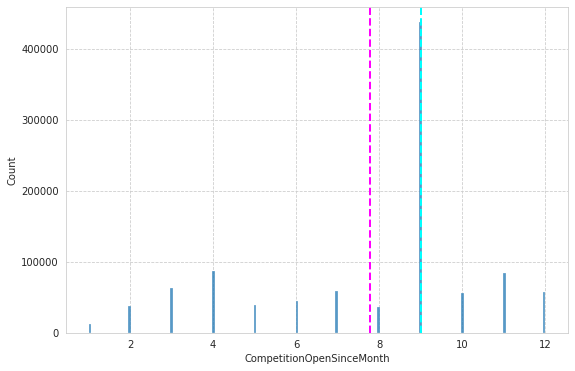

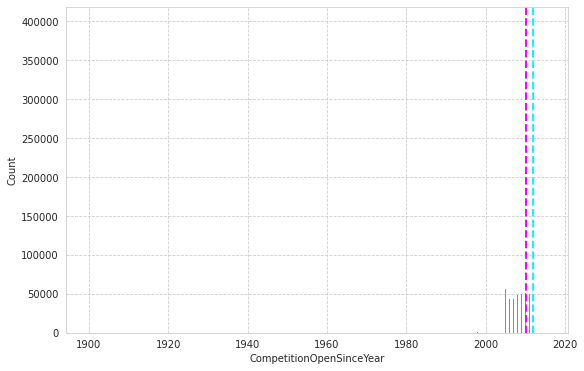

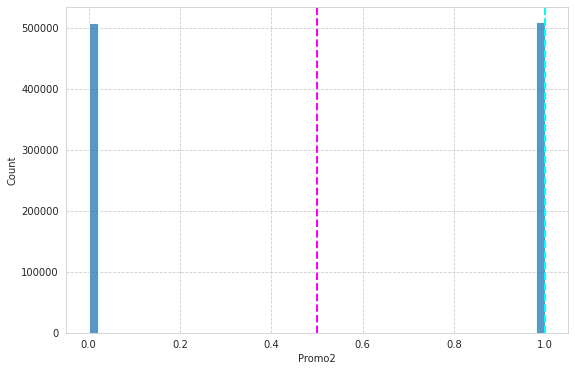

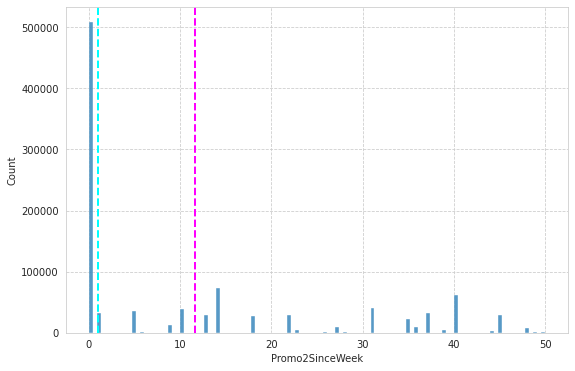

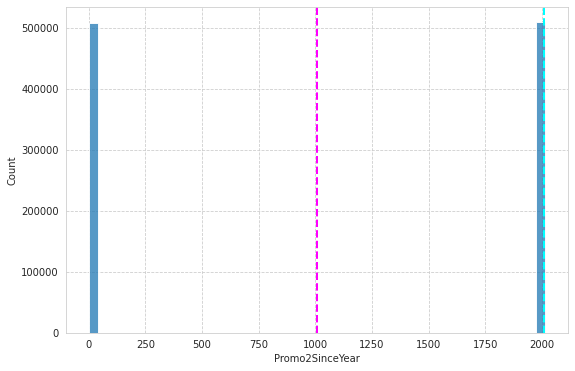

In [ ]:
#plotting histogram of dataset
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9, 6))
  sns.histplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)   
  plt.show()

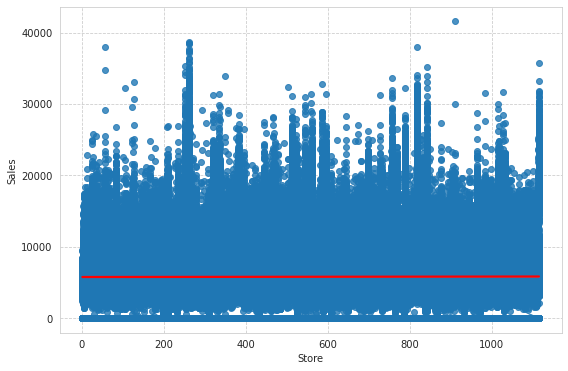

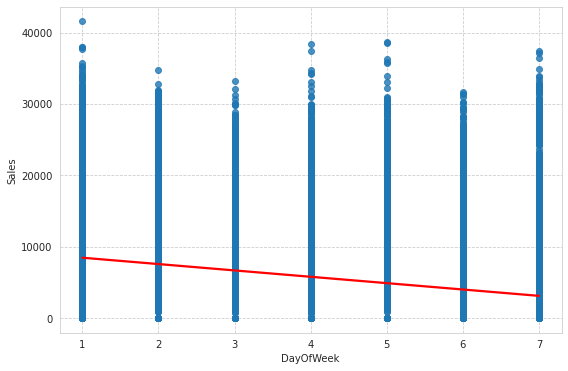

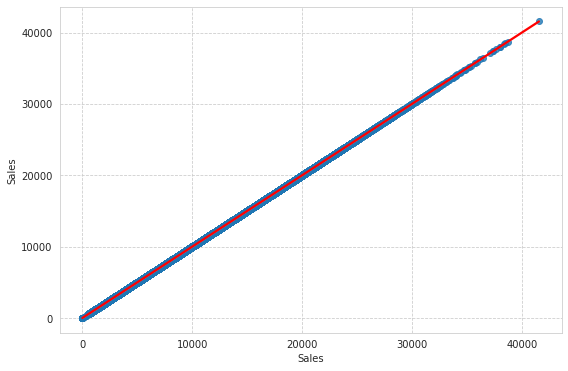

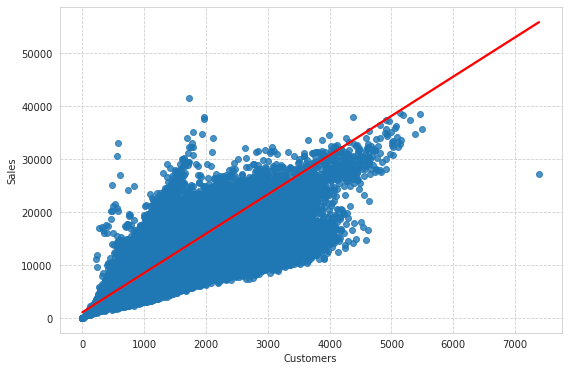

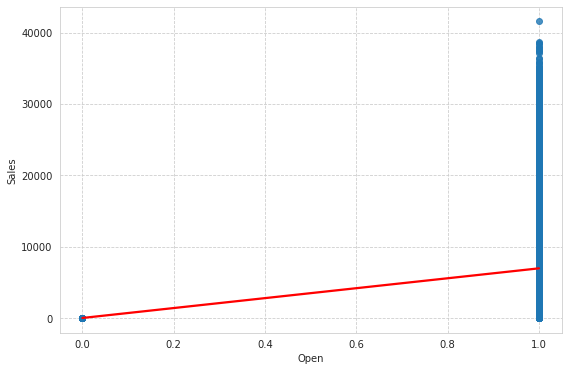

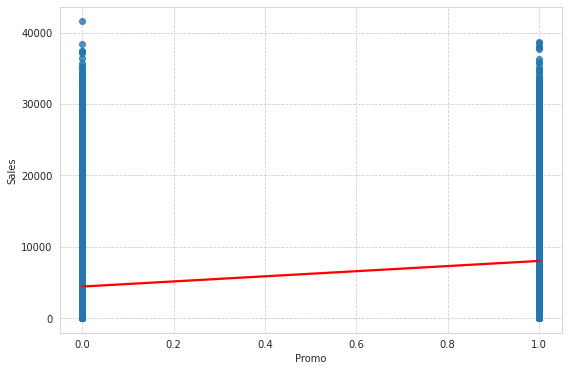

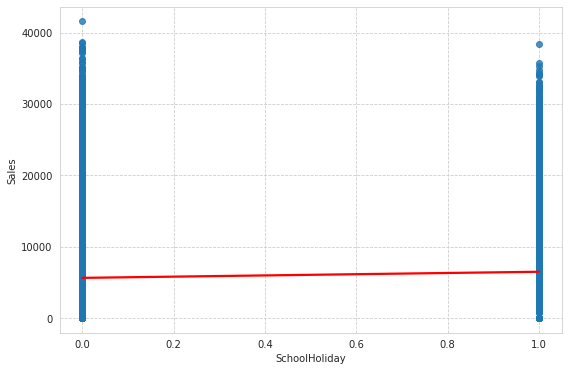

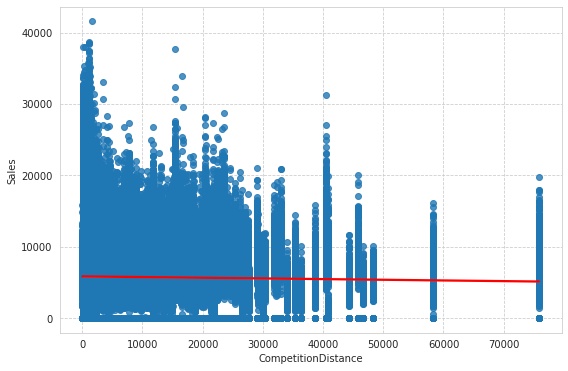

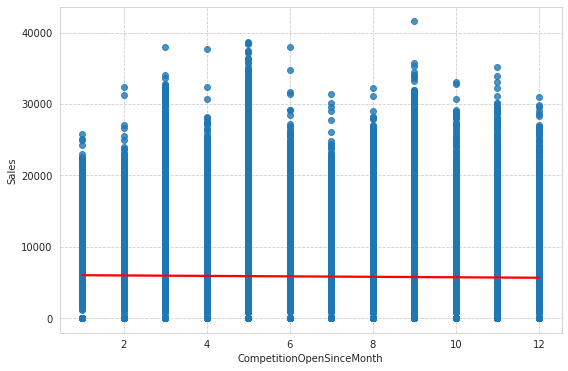

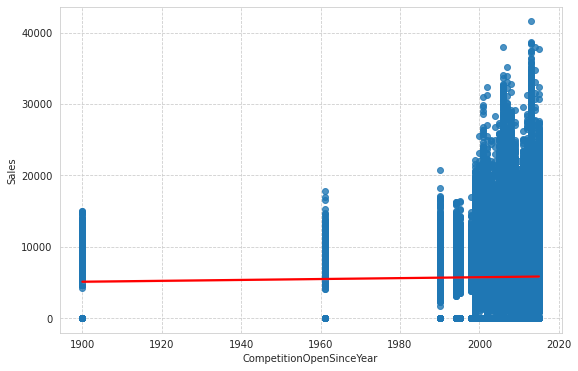

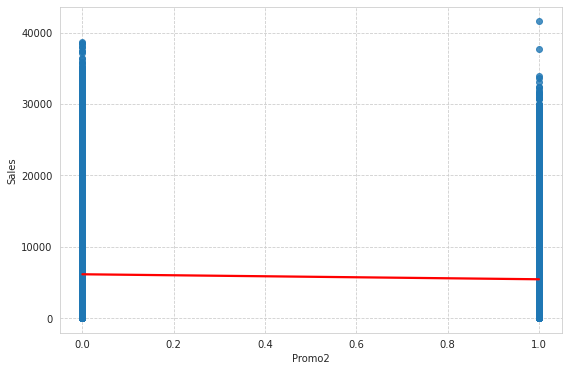

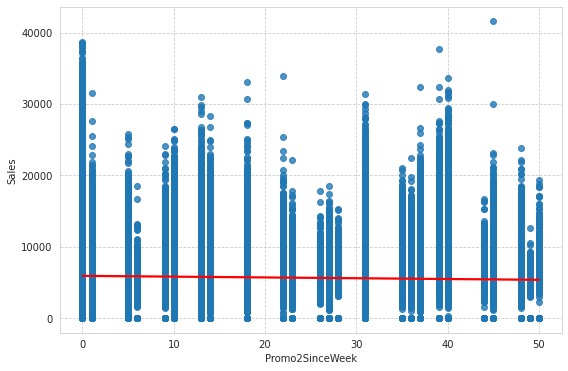

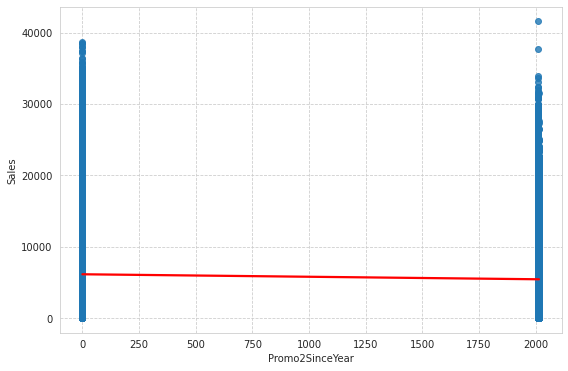

In [ ]:
# ploting Regression plot of each columns of dataset v/s sales count columns
for col in numeric_features[:]:
  fig = plt.figure(figsize=(9, 6))
  if col == 'sales':
    pass
  else:
    sns.regplot(x=df[col],y=df["Sales"],line_kws={"color": "red"})
  
  plt.show()

**barplots visualization of numeric_features of each columns of dataset v/s Sales count columns**

In [40]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   SchoolHoliday              1017209 non-null  int64  
 7   CompetitionDistance        1017209 non-null  float64
 8   CompetitionOpenSinceMonth  1017209 non-null  float64
 9   CompetitionOpenSinceYear   1017209 non-null  float64
 10  Promo2                     1017209 non-null  int64  
 11  Promo2SinceWeek            1017209 non-null  float64
 12  Promo2SinceYear            1017209 non-null  float64
dtypes: float64(5

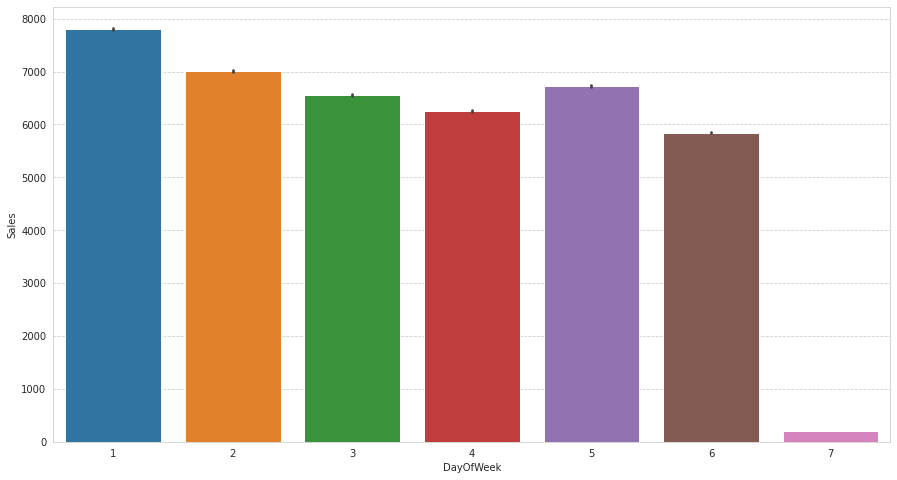

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df); 

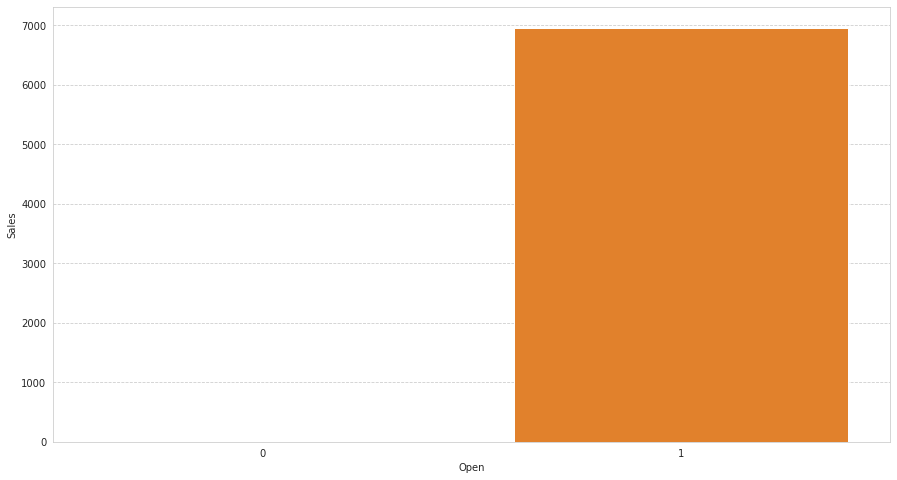

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='Open', y='Sales' ,data=df); 

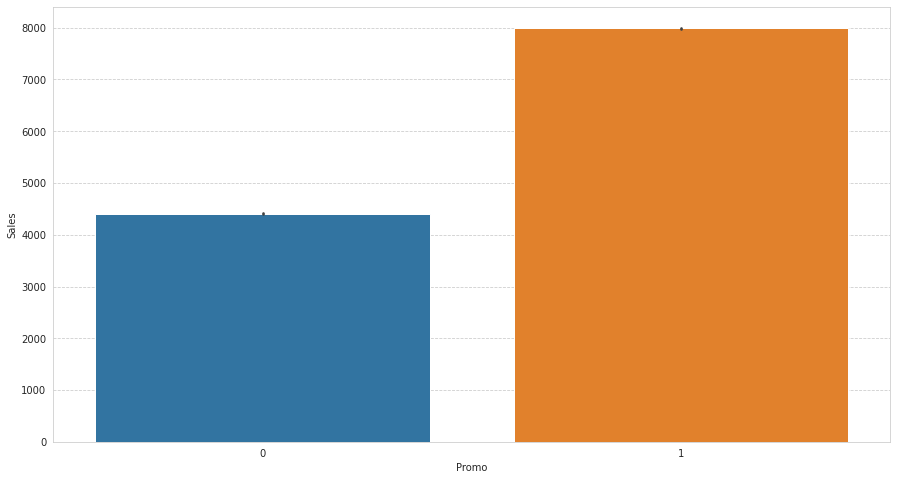

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='Promo', y='Sales' ,data=df); 

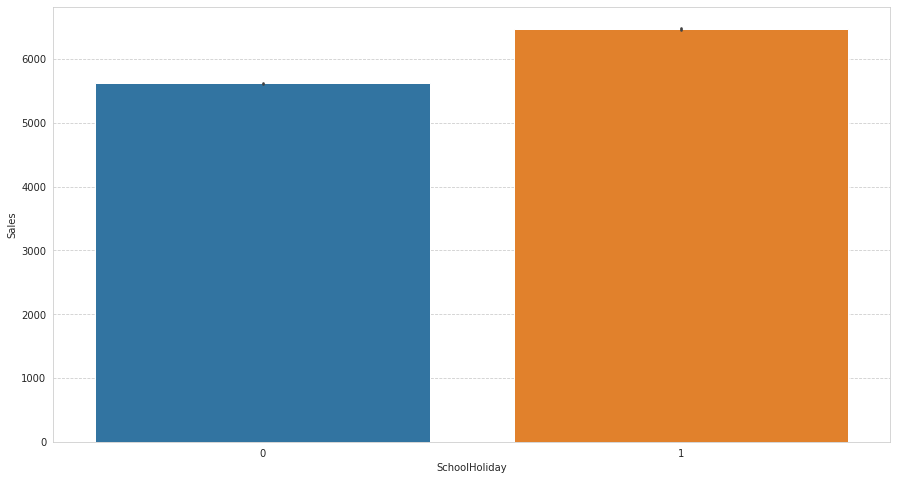

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='SchoolHoliday', y='Sales' ,data=df); 

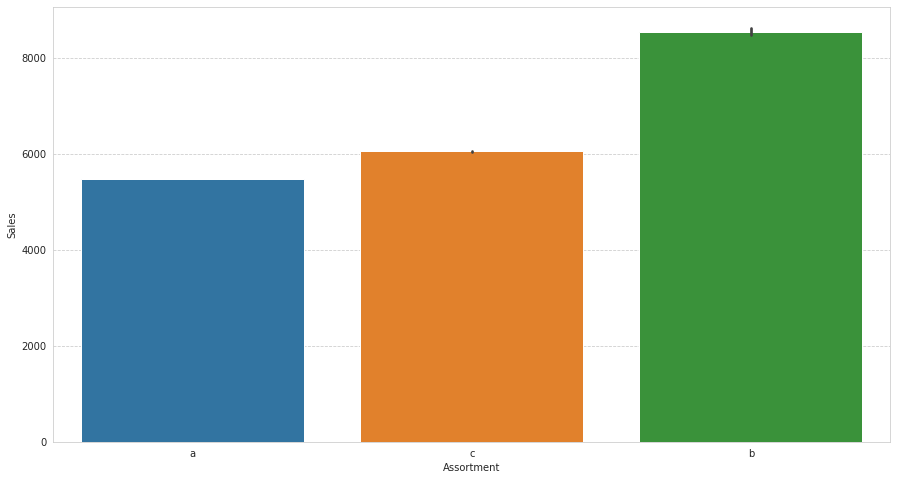

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8)) 
sns.barplot(x='Assortment', y='Sales' ,data=df)

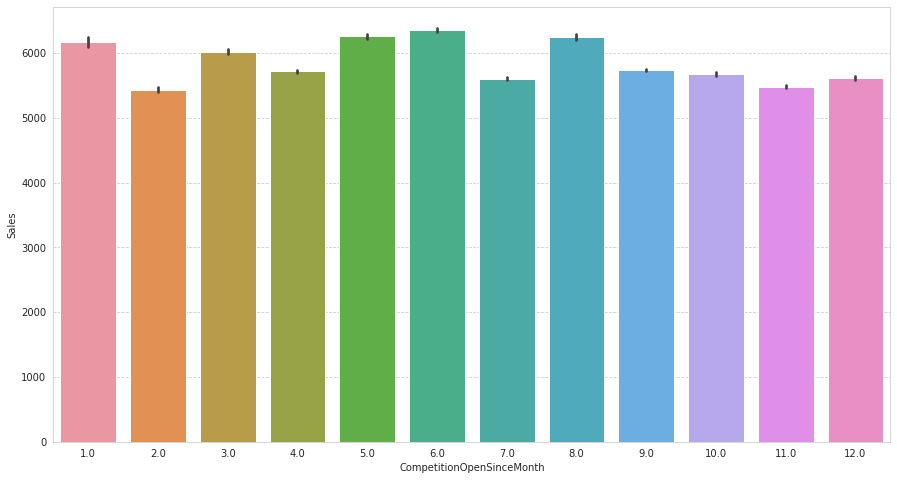

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='CompetitionOpenSinceMonth', y='Sales' ,data=df); 

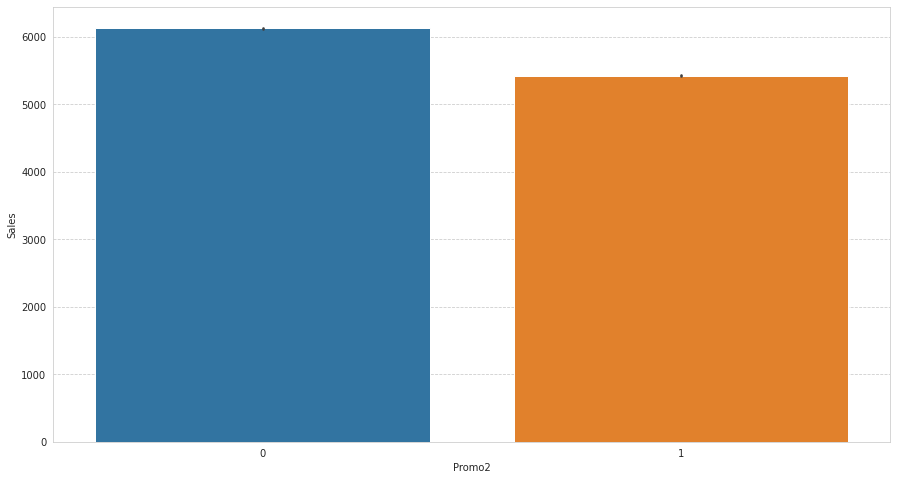

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='Promo2', y='Sales' ,data=df);

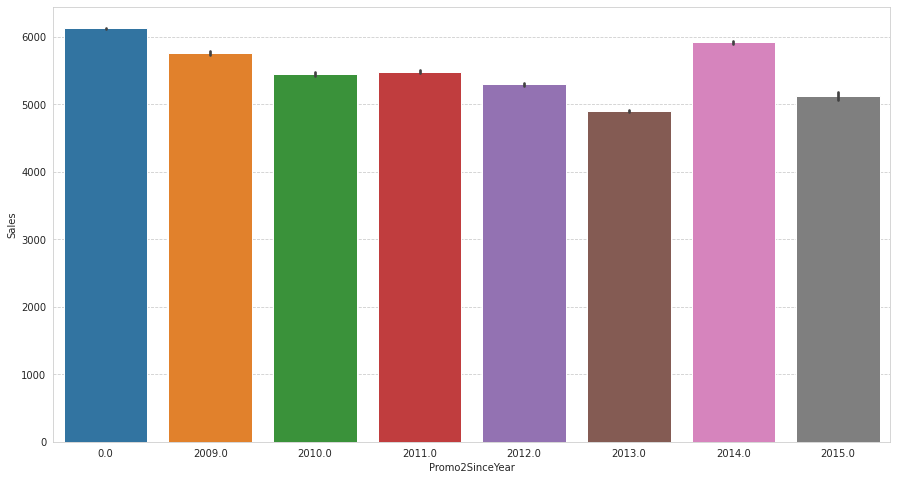

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='Promo2SinceYear', y='Sales' ,data=df); 

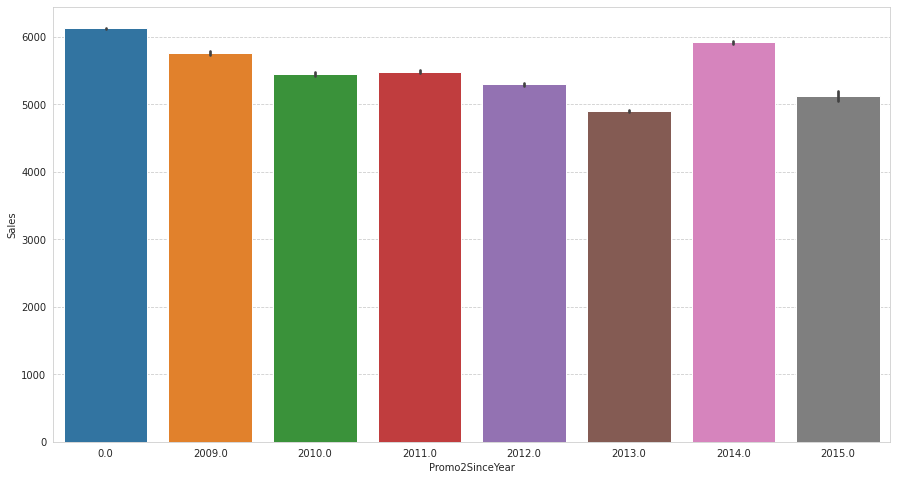

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='Promo2SinceYear', y='Sales' ,data=df); 

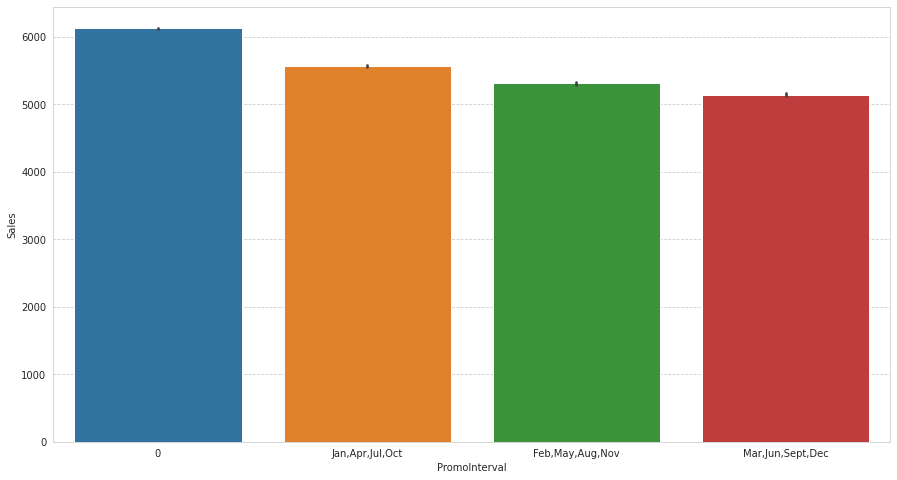

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='PromoInterval', y='Sales' ,data=df); 

# Feature_Engineering

In [41]:
categorical_features

,Date,StateHoliday,StoreType,Assortment,PromoInterval
0,2015-07-31,0,c,a,0
1,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
2,2015-07-31,0,a,a,"Jan,Apr,Jul,Oct"
3,2015-07-31,0,c,c,0
4,2015-07-31,0,a,a,0
...,...,...,...,...,...
1017204,2013-01-01,a,a,a,"Jan,Apr,Jul,Oct"
1017205,2013-01-01,a,c,c,0
1017206,2013-01-01,a,a,c,0
1017207,2013-01-01,a,a,c,0


In [42]:
categorical_features.drop('Date', inplace=True, axis=1)

In [43]:
categorical_features

,StateHoliday,StoreType,Assortment,PromoInterval
0,0,c,a,0
1,0,a,a,"Jan,Apr,Jul,Oct"
2,0,a,a,"Jan,Apr,Jul,Oct"
3,0,c,c,0
4,0,a,a,0
...,...,...,...,...
1017204,a,a,a,"Jan,Apr,Jul,Oct"
1017205,a,c,c,0
1017206,a,a,c,0
1017207,a,a,c,0


In [44]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,0,1,0,0,0,0,0,0,0,0,1,0
1017205,0,1,0,0,0,1,0,0,1,0,0,0
1017206,0,1,0,0,0,0,0,0,1,0,0,0
1017207,0,1,0,0,0,0,0,0,1,0,0,0


In [45]:
numeric_features
final_df= pd.concat([numeric_features,dummy_categorical_feature],axis=1)
final_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,5263,555,1,1,1,1270.0,9.0,2008.0,...,0,0,0,1,0,0,0,0,0,0
1,2,5,6064,625,1,1,1,570.0,11.0,2007.0,...,0,0,0,0,0,0,0,0,1,0
2,3,5,8314,821,1,1,1,14130.0,12.0,2006.0,...,0,0,0,0,0,0,0,0,1,0
3,4,5,13995,1498,1,1,1,620.0,9.0,2009.0,...,0,0,0,1,0,0,1,0,0,0
4,5,5,4822,559,1,1,1,29910.0,4.0,2015.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,0,1,1900.0,6.0,2014.0,...,0,0,0,0,0,0,0,0,1,0
1017205,1112,2,0,0,0,0,1,1880.0,4.0,2006.0,...,0,0,0,1,0,0,1,0,0,0
1017206,1113,2,0,0,0,0,1,9260.0,9.0,2013.0,...,0,0,0,0,0,0,1,0,0,0
1017207,1114,2,0,0,0,0,1,870.0,9.0,2013.0,...,0,0,0,0,0,0,1,0,0,0


# Box plot shows that we have a very high outliers in sales

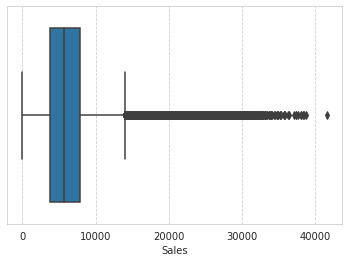

In [ ]:
#checking outliers in sales
sns.boxplot(df['Sales'])

**Removing Outliers Of Sales Column**

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(final_df, 'Sales')

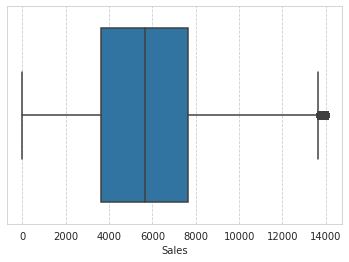

In [ ]:
#checking outliers in sales
sns.boxplot(df['Sales'])

In [ ]:
final_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,...,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,7.787777e+00,2.010060e+03,...,6.576820e-03,4.030637e-03,1.556219e-02,1.345250e-01,3.076182e-01,8.153683e-03,4.634937e-01,1.165896e-01,2.881630e-01,9.581119e-02
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,2.778755e+00,5.340757e+00,...,8.083051e-02,6.335925e-02,1.237741e-01,3.412156e-01,4.615078e-01,8.992891e-02,4.986658e-01,3.209308e-01,4.529076e-01,2.943323e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000e+00,1.900000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,6.000000e+00,2.008000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,9.000000e+00,2.012000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.013000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


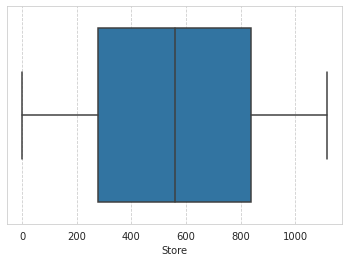

In [ ]:
#checking outliers in store
sns.boxplot(df['Store'])

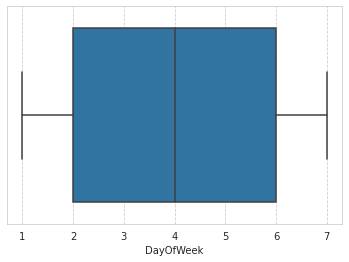

In [ ]:
#checking outliers in dayofweek
sns.boxplot(df['DayOfWeek'])

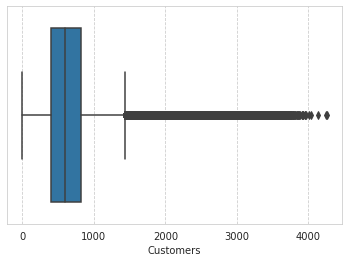

In [ ]:

#checking outliers in customers
sns.boxplot(df['Customers'])

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(final_df, 'Customers')

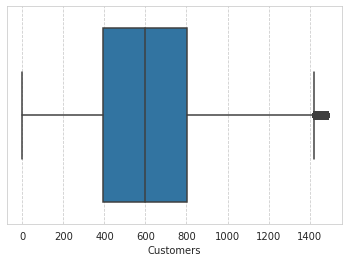

In [ ]:
#checking outliers in customers
sns.boxplot(df['Customers'])

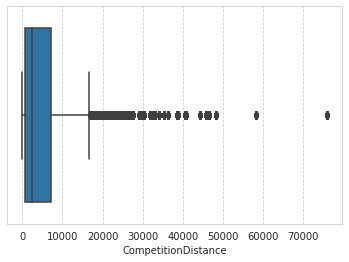

In [ ]:
#checking outliers in CompetitionDistance
sns.boxplot(df['CompetitionDistance'])

In [ ]:
# defining new variable after removing outliers
df= remove_outlier(final_df, 'CompetitionDistance')

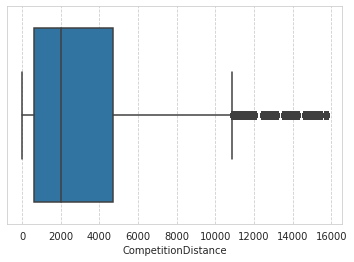

In [ ]:
#checking outliers in CompetitionDistance
sns.boxplot(df['CompetitionDistance'])

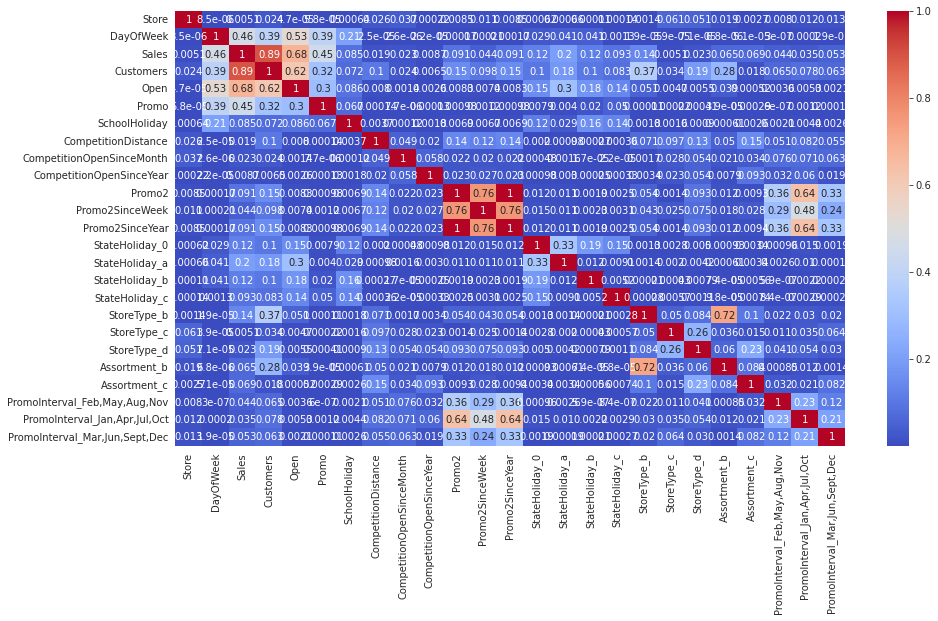

In [ ]:
 ## Correlation of all data
plt.figure(figsize=(15,8))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.048387e+00
1,DayOfWeek,8.588586e+00
2,Customers,6.618447e+00
3,Open,1.439734e+01
4,Promo,2.015890e+00
5,SchoolHoliday,1.338493e+00
6,CompetitionDistance,1.641201e+00
7,CompetitionOpenSinceMonth,9.062603e+00
8,CompetitionOpenSinceYear,4.891901e+01
9,Promo2,inf


In [ ]:
final_df.drop('DayOfWeek', inplace=True, axis=1)

In [ ]:
final_df.drop('PromoInterval_Feb,May,Aug,Nov', inplace=True, axis=1)

In [ ]:
final_df.drop('PromoInterval_Jan,Apr,Jul,Oct', inplace=True, axis=1)

In [ ]:
final_df.drop('PromoInterval_Mar,Jun,Sept,Dec', inplace=True, axis=1)

In [ ]:
calc_vif(final_df[[i for i in final_df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.046001e+00
1,Customers,6.577479e+00
2,Open,1.183546e+01
3,Promo,1.889014e+00
4,SchoolHoliday,1.314858e+00
5,CompetitionDistance,1.641096e+00
6,CompetitionOpenSinceMonth,8.959069e+00
7,CompetitionOpenSinceYear,2.798488e+01
8,Promo2,1.576497e+06
9,Promo2SinceWeek,3.994579e+00


**FInally we can handle outliers and multicolinearity**

# Train | Test Split

In [46]:
# Train - Spliting  data
X=final_df.drop(['Sales'],axis=1)

In [47]:
X

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,...,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,555,1,1,1,1270.0,9.0,2008.0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,5,625,1,1,1,570.0,11.0,2007.0,1,...,0,0,0,0,0,0,0,0,1,0
2,3,5,821,1,1,1,14130.0,12.0,2006.0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,5,1498,1,1,1,620.0,9.0,2009.0,0,...,0,0,0,1,0,0,1,0,0,0
4,5,5,559,1,1,1,29910.0,4.0,2015.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,0,0,0,1,1900.0,6.0,2014.0,1,...,0,0,0,0,0,0,0,0,1,0
1017205,1112,2,0,0,0,1,1880.0,4.0,2006.0,0,...,0,0,0,1,0,0,1,0,0,0
1017206,1113,2,0,0,0,1,9260.0,9.0,2013.0,0,...,0,0,0,0,0,0,1,0,0,0
1017207,1114,2,0,0,0,1,870.0,9.0,2013.0,0,...,0,0,0,0,0,0,1,0,0,0


In [48]:
y=np.sqrt(final_df['Sales'])  #  np.sqrt meansReturns the square root of the number in an array.

In [49]:
y

0           72.546537
1           77.871689
2           91.181138
3          118.300465
4           69.440622
              ...    
1017204      0.000000
1017205      0.000000
1017206      0.000000
1017207      0.000000
1017208      0.000000
Name: Sales, Length: 1017209, dtype: float64

In [50]:
# separate dataset into train and test
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Linear Regresseion

In [53]:
# appying linearRegression
from sklearn.linear_model import LinearRegression

In [54]:
#creating linear regression model
linear_model= LinearRegression()

In [55]:
#fitting training data into linear model
linear_model.fit(X_train,y_train)

LinearRegression()

In [56]:
#predicting through linear model
y_pred=linear_model.predict(X_test)

In [57]:
y_pred

array([89.74618175, 73.8185774 , 70.68286266, ..., 70.42119218,
       64.75765849, 70.70650127])

In [58]:
linear_model.score(X_train, y_train)

0.955894791789184

# Creating Function to train linear models and calculate scores

In [59]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [60]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)
  
  print('\n================Evalution Matrix=========================\n')
  

#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)
    
  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')  
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()


================Evalution Matrix=========================

MSE : 1876374.0963435571
RMSE : 1369.808050912082
R2 : 0.8738324385404368
Adjusted R2 :  0.8738205302295525

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



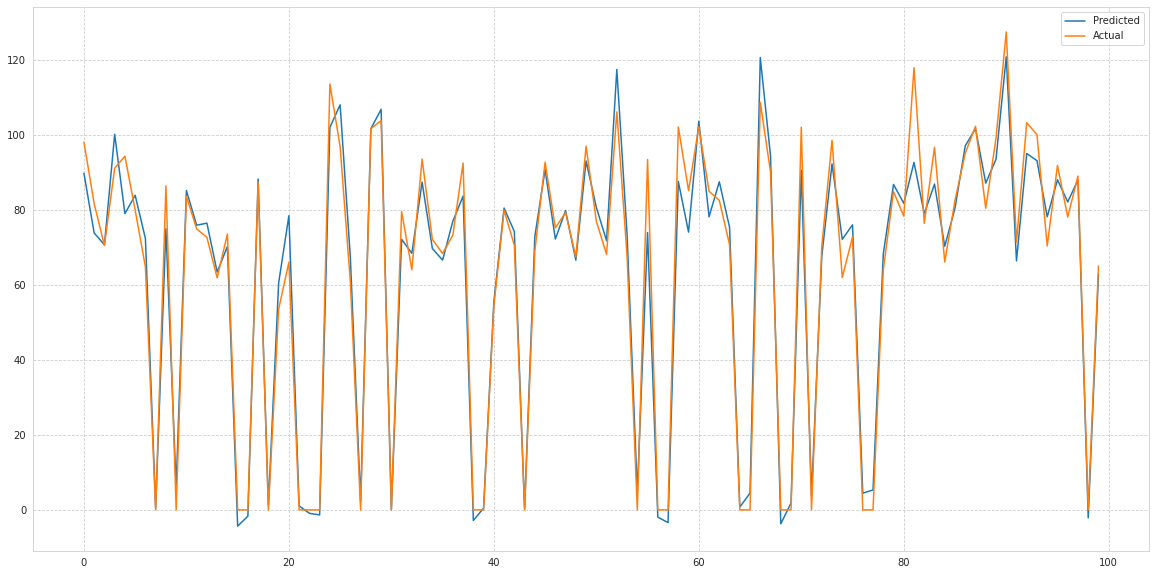

In [61]:
# calling train_linear_model to train,fit and evalution of linear model
train_linear_model(linear_model,X_train,y_train,X_test,y_test)

# Polynomial Regression

In [62]:
#creating pipeline to convert x to polynomial feature and apply Linear Regression

from sklearn.pipeline import make_pipeline
#importing polynomial features
from sklearn.preprocessing import PolynomialFeatures

In [63]:
pipe=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())


================Evalution Matrix=========================

MSE : 1020622.5466413022
RMSE : 1010.2586533365118
R2 : 0.9313732490065216
Adjusted R2 :  0.9313667716784639

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



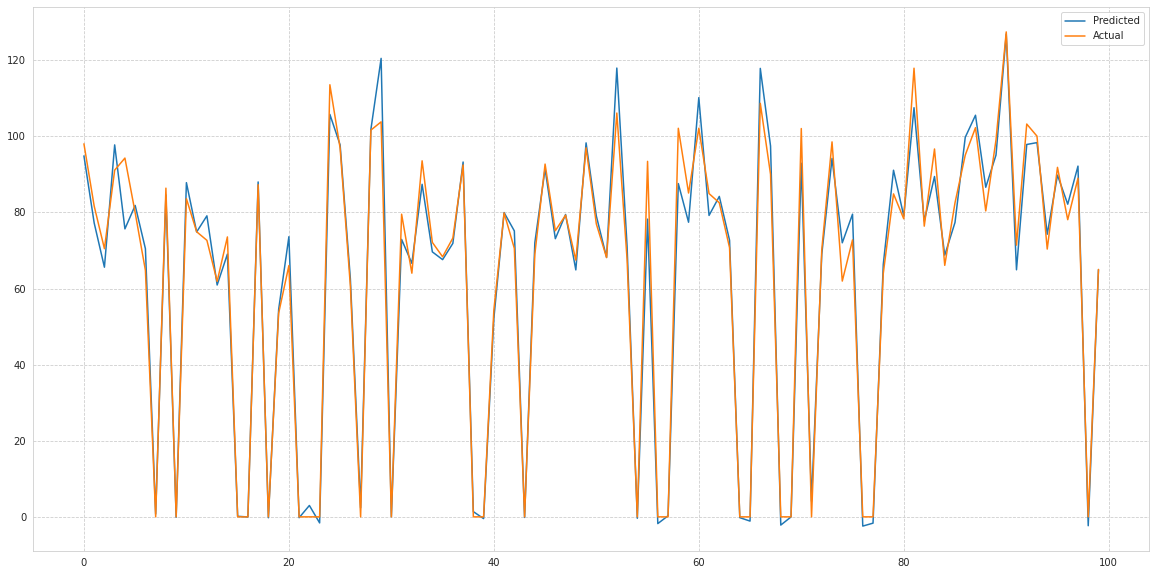

In [64]:
# calling train_linear_model to train,fit and evalution of polynomial model
train_linear_model(pipe,X_train,y_train,X_test,y_test)

# Regularisation

In [65]:
#importing lasso 
from sklearn.linear_model import Lasso

In [66]:
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)


================Evalution Matrix=========================

MSE : 1877394.6586626852
RMSE : 1370.1805204653456
R2 : 0.8737638158391468
Adjusted R2 :  0.8737519010513166

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



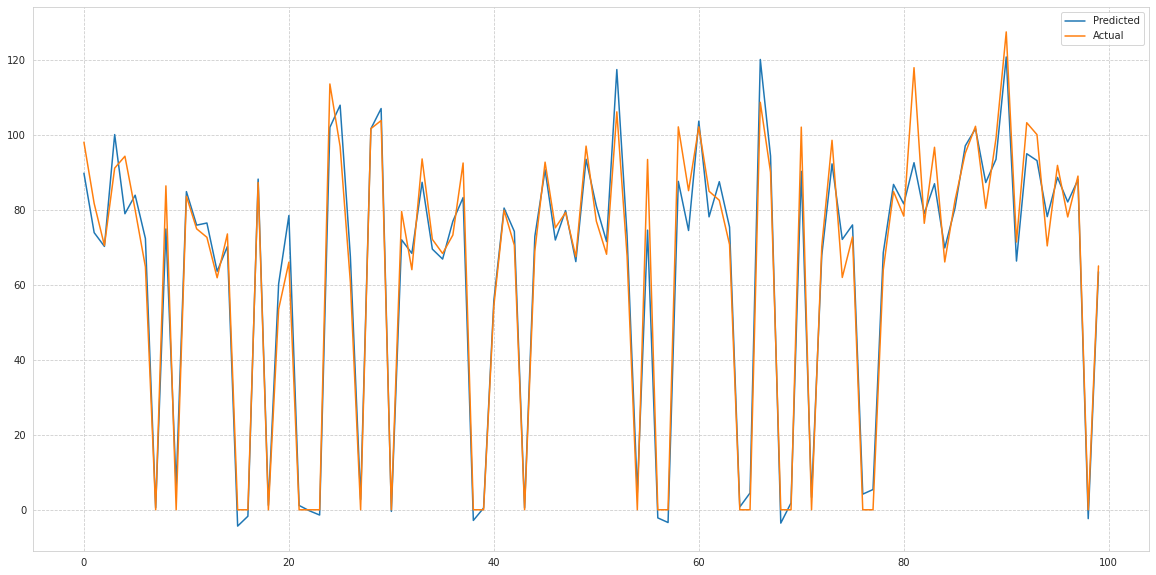

In [67]:
# calling train_linear_model to train,fit and evalution of lasso model
train_linear_model(lasso,X_train,y_train,X_test,y_test)

In [68]:
lasso.score(X_train, y_train)

0.9558413658156293

# Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)


================Evalution Matrix=========================

MSE : 1878594.6750772987
RMSE : 1370.6183550052504
R2 : 0.8736831266284832
Adjusted R2 :  0.8736712042248111

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



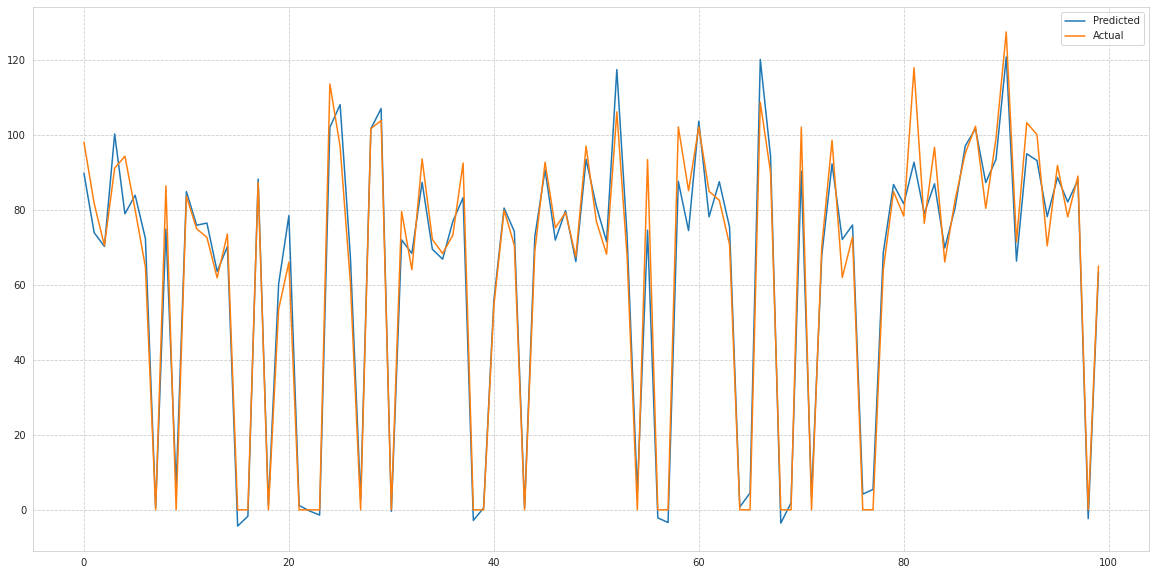

In [70]:
# calling train_linear_model to train,fit and evalution of ridge model
train_linear_model(ridge_reg,X_train,y_train,X_test,y_test)

# creating function to run diffirent models

In [71]:

def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)
    
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting 
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n') 
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])    
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

# Decision Tree Regression

In [72]:
#importing Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [73]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X_train.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);


================Evalution Matrix=========================

MSE : 12.09017046310017
RMSE : 3.477092242535445
R2 : 0.989847980124993
Adjusted R2 :  0.9898470219277561

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



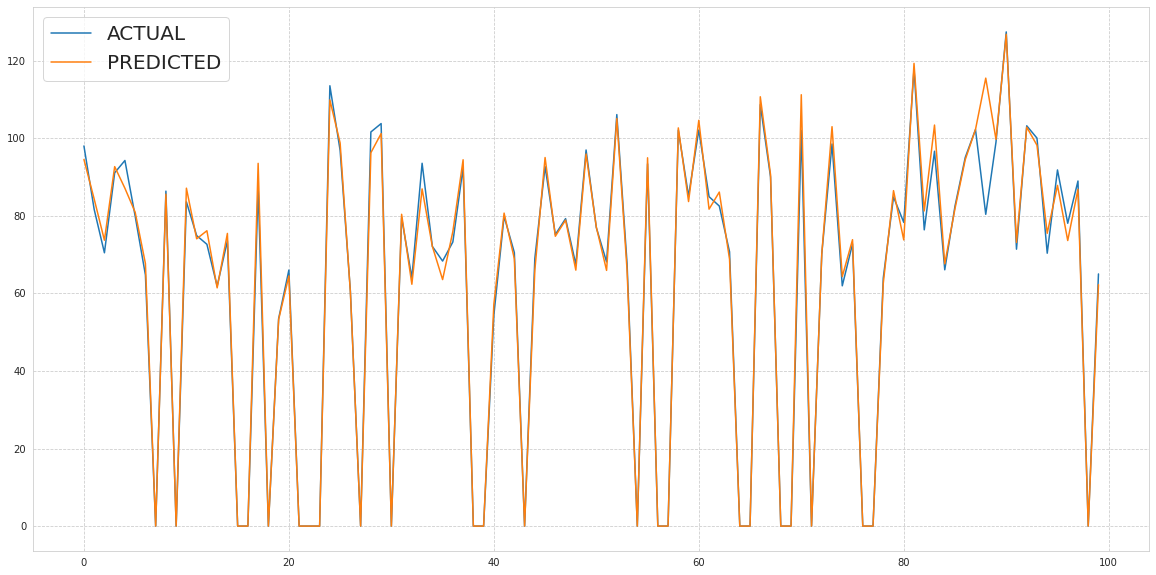

In [74]:


#creating decision tree model
dt_model = DecisionTreeRegressor()
#calling run_model to train,fit and evalution of decision tree model

run_model(dt_model,X_train,y_train,X_test,y_test)

#creating function to get feature importance

In [8]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X_train.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);

==========================Features Importance============================

 DecisionTreeRegressor()  



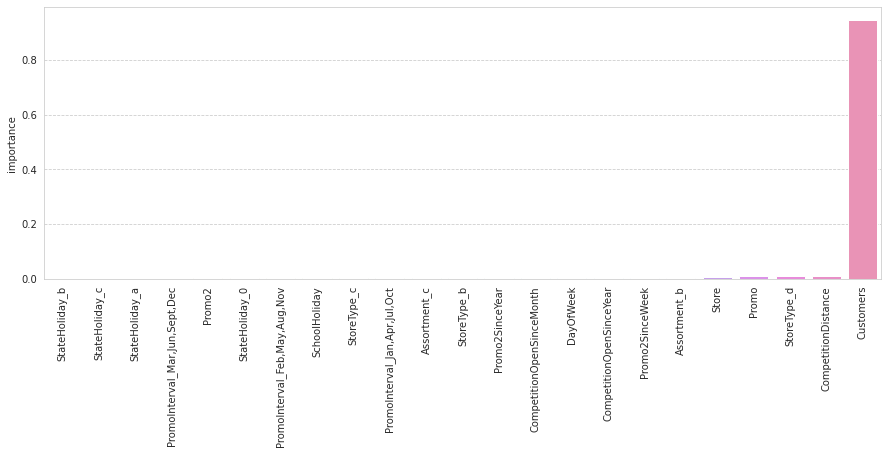

In [75]:
#getting features importance of decision tree
get_features_importance(dt_model,X_train)

# Evaluation Matrix of each models

In [76]:
#creating dictionary to store all the metrices 
all_model_matrices={'Mean_square_error':mean_sq_error,'Root_Mean_square_error':root_mean_sq_error,'R2':r2_list,'Adjusted_R2':adj_r2_list}

In [77]:
#list of all model made
model_name=['Linear','Polynomial','Lasso','Ridge','Decision_Tree']

In [78]:
#converting dictionary to dataframe fro easy visual
matrices_df=pd.DataFrame.from_dict(all_model_matrices,orient="index" ,columns=model_name)

In [79]:
matrices_df

,Linear,Polynomial,Lasso,Ridge,Decision_Tree
Mean_square_error,1.876374e+06,1.020623e+06,1.877395e+06,1.878595e+06,12.090170
Root_Mean_square_error,1.369808e+03,1.010259e+03,1.370181e+03,1.370618e+03,3.477092
R2,8.738324e-01,9.313732e-01,8.737638e-01,8.736831e-01,0.989848
Adjusted_R2,8.738205e-01,9.313668e-01,8.737519e-01,8.736712e-01,0.989847


In [80]:
#transposing matrices_df for easy and clear view and saving that as new final matrices df
final_matrices=matrices_df.transpose().reset_index().rename(columns={'index':'Models'})

In [81]:
final_matrices

,Models,Mean_square_error,Root_Mean_square_error,R2,Adjusted_R2
0,Linear,1.876374e+06,1369.808051,0.873832,0.873821
1,Polynomial,1.020623e+06,1010.258653,0.931373,0.931367
2,Lasso,1.877395e+06,1370.180520,0.873764,0.873752
3,Ridge,1.878595e+06,1370.618355,0.873683,0.873671
4,Decision_Tree,1.209017e+01,3.477092,0.989848,0.989847


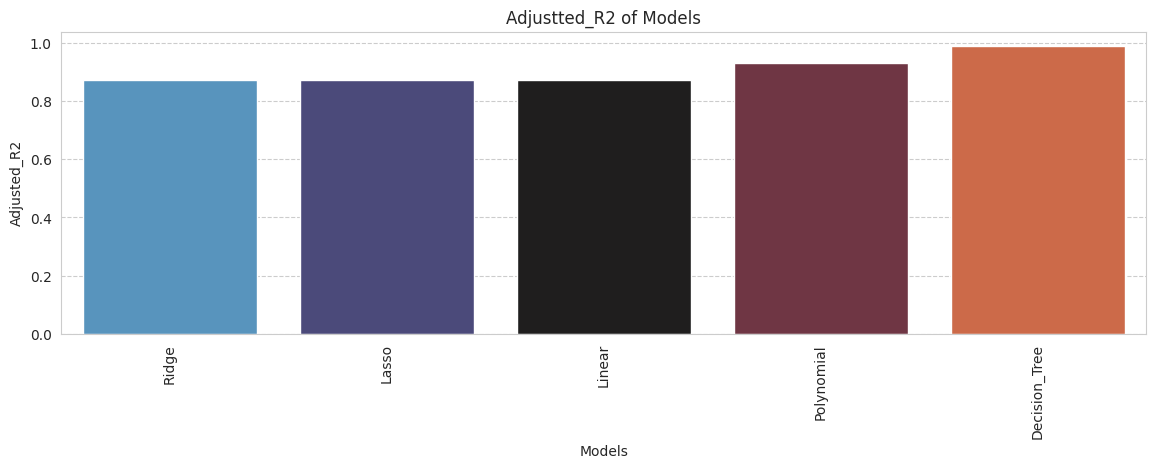

In [82]:
#creating bar plot to visualize the Adjusted R2 of model 
plt.figure(figsize=(14,4),dpi=100)
sns.barplot(x='Models',y='Adjusted_R2',data=final_matrices.sort_values('Adjusted_R2'),palette="icefire").set(title='Adjustted_R2 of Models')
plt.xticks(rotation=90);

# Final Conclusion:

**It is quite evident from the results that polynomial and Desission Tree is the best model that can be used for the Rossmann Sales Prediction since the performance metrics (mse,rmse) shows lower and (r2,adjusted_r2) show a higher value for the polynomial and Desission Tree**